In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt 


In [2]:
path = '../data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us'

In [4]:
!cd $path && git pull

remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 10 (delta 8), reused 8 (delta 6), pack-reused 0
Unpacking objects: 100% (10/10), 22.12 KiB | 365.00 KiB/s, done.
From https://github.com/CSSEGISandData/COVID-19
   033a04dae..62f067493  web-data   -> origin/web-data
Already up to date.


In [3]:
all_files = glob.glob(path + "/*.csv")
a =all_files[0].split("/")[-1].replace(".csv", "")

In [8]:
data = []
prev = 0 
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    date = filename.split("/")[-1].replace(".csv", "")
    datetimeobject = datetime.strptime(date,'%m-%d-%Y')
    cur = df["Confirmed"].sum()
    tmp = [datetimeobject.strftime('%Y-%m-%d'), cur]
    data.append(tmp)

In [9]:
us_df = pd.DataFrame(data, columns = ['Date', 'Confirmed'])

In [10]:
us_df = us_df.set_index("Date").sort_index()

In [11]:
us_df["NewCases"] = us_df["Confirmed"] - us_df["Confirmed"] 

In [12]:
us_df["NewCases"] = us_df.Confirmed.diff()

In [13]:
us_df.to_csv("jhu-us.csv")

<AxesSubplot:xlabel='Date'>

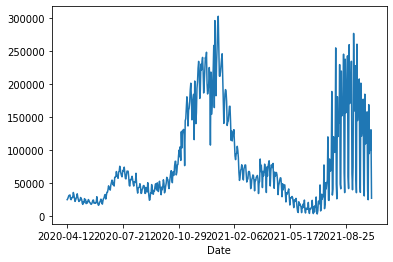

In [14]:
us_df["NewCases"].plot()